### Project
- Predictive Modeling for Insurance Claim Probability based on comprehensive car policy features and safety ratings

### Business Problem Statement
- Develop a predictive model that assesses the claim probability for car insurance policies. The objective would be to understand the factors that influence claim frequency and severity in the period of six months and enable insurance companies to better assess risk and determine appropriate premiums for policyholders.

### Importing Libraries

In [1]:
# Dataset Handling
import pandas as pd
import numpy as np
import re
import sklearn
from sklearn.utils import resample

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import itertools

# Model Building
import sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Metrics evaluation 
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

import warnings
warnings.filterwarnings("ignore")

### Loading Dataset

In [2]:
# Returns dimensionality of dataset to understand the total number of Rows and Colums
df = pd.read_csv(r"/home/tejaswinidev/Downloads/Insurance_Data.csv",)
print(df.shape) 

(58592, 44)


- Total number of Rows: 58592
- Toal No of Columns: 44
- 43 Predictor Variables and 1 Target Variable

### Data Insights

In [3]:
df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [4]:
df.tail()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
58587,ID58588,0.355089,0.13,0.644231,C8,8794,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
58588,ID58589,1.199642,0.02,0.519231,C14,7788,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58589,ID58590,1.162273,0.05,0.451923,C5,34738,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58590,ID58591,1.236307,0.14,0.557692,C8,8794,1,B2,M6,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
58591,ID58592,0.124429,0.02,0.442308,C8,8794,3,C2,M4,Diesel,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0


### Structural Information

In [5]:
# Returns information about the data type, non-null values and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

- Dataset consists of 16 numeric, 28 categorical values 
- No missing values

#### Descriptive information of the dataset
- This information includes statistics that summarize the central tendency of the variable, their dispersion, the 
presence of empty values and their shape. 

In [6]:
df.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


### List of Columns

In [7]:
df.columns

Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'segment', 'model',
       'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')

### Understanding different features

1. **Policy Tenure**: Longer policy tenure may lead to a lower claim probability as it indicates loyalty and responsible policyholders.
2. **Age of Car**: Older cars may have higher claim probabilities due to wear and tear.
3. **Age of Policyholder**: Younger policyholders might have a higher claim probability as they may be less experienced drivers.
4. **Area Cluster**: High-density urban areas may have more claims due to traffic and theft.
5. **Population Density**: Higher population density can lead to more accidents and claims.
6. **Make**: Some car makes are associated with higher safety, potentially reducing claim probability.
7. **Segment**: Larger or more luxurious car segments may have lower claim probabilities due to responsible drivers.
8. **Fuel Type**: Diesel cars may have more claims due to their usage in commercial vehicles.
9. **Max Torque and Max Power**: Higher engine performance may increase claim probabilities due to riskier driving behavior.
10. **Engine Type**: V-type engines may be found in sports cars, potentially leading to more claims.
11. **Airbags**: More airbags can lower claim probability by enhancing safety.
12. **Electronic Stability Control (ESC)**: Cars with ESC may have lower claim probabilities due to better control in adverse conditions.
13. **Adjustable Steering**: It may not significantly affect claim probability.
14. **Tire Pressure Monitoring System (TPMS)**: TPMS can lower claims by preventing tire-related accidents.
15. **Parking Sensors and Camera**: They can reduce collision claims by aiding parking.
16. **Rear Brakes Type**: Brake type might impact stopping distances and collision severity.
17. **Displacement and Cylinder**: Higher values may correlate with more powerful cars and higher claim probabilities.
18. **Transmission Type and Gearbox**: Automatic transmissions may lead to safer driving and lower claims.
19. **Steering Type and Turning Radius**: They might influence maneuverability and claim probability.
20. **Dimensions (Length, Width, Height, Gross Weight)**: Larger dimensions and weight can impact accident severity and claim amount.
21. **Front Fog Lights**: They can improve visibility and reduce claim probability.
22. **Rear Window Features**: They may not significantly affect claim probability.
23. **Brake Assist**: Brake assist can reduce collision severity and claim amounts.
24. **Power Door Locks and Central Locking**: They can deter theft and reduce claim probability.
25. **Power Steering**: It may not significantly affect claim probability.
26. **Driver Seat Height Adjustment**: It can improve driver visibility and safety.
27. **Day/Night Rearview Mirror**: It can reduce glare-related accidents.
28. **Electronic Crash Warning (ECW) System**: ECW can lower claim probability by alerting drivers to potential collisions.
29. **Speed Alert System**: It can encourage safer driving and reduce speeding-related claims.
30. **NCAP Rating**: Higher NCAP ratings indicate safer cars with lower claim probabilities.

### Data Cleaning

In [8]:
df.isna().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

- We can observe there are no missing values

### Dropping the unnecessary policy id column

In [9]:
df = df.drop('policy_id', axis=1)

In [10]:
# unique value counts
df.nunique()

policy_tenure                       58592
age_of_car                             49
age_of_policyholder                    75
area_cluster                           22
population_density                     22
make                                    5
segment                                 6
model                                  11
fuel_type                               3
max_torque                              9
max_power                               9
engine_type                            11
airbags                                 3
is_esc                                  2
is_adjustable_steering                  2
is_tpms                                 2
is_parking_sensors                      2
is_parking_camera                       2
rear_brakes_type                        2
displacement                            9
cylinder                                2
transmission_type                       2
gear_box                                2
steering_type                     

### Selecting the Target Class for Insurance Claim Evaluation
- Now, our next step involves choosing a target class to assess whether an insurance claim has been approved or denied. To do this, we will leverage the 'is_claim' attribute. The 'is_claim' attribute is a binary value that indicates whether the claim has been approved or denied.

In [11]:
df['is_claim'].value_counts()

0    54844
1     3748
Name: is_claim, dtype: int64

In [12]:
df['is_claim'].value_counts(normalize=True)

0    0.936032
1    0.063968
Name: is_claim, dtype: float64

- This output confirms the distribution of the 'is_claim' column in the DataFrame, showing that there are 54,844 instances where the value is 0, indicating that the insurance claim was not claimed, and 3,748 instances where the value is 1, indicating that the insurance claim was claimed.

###  Visual Representation

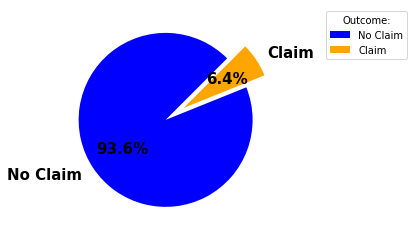

In [13]:
fig = plt.figure(facecolor='white')

ax = fig.add_subplot(1, 1, 1, facecolor='white')

plt.pie(df['is_claim'].value_counts(), labels=['No Claim', 'Claim'], radius=1, colors=['blue', 'orange'],
        autopct='%1.1f%%', explode=[0.1, 0.15], labeldistance=1.15, startangle=45,
        textprops={'fontsize': 15, 'fontweight': 'bold'})

plt.legend(title='Outcome:', loc='upper right', bbox_to_anchor=(1.6, 1))

fig.patch.set_facecolor('white')

plt.show()

#### Next, we will generate histograms to get valuable insights from the data.

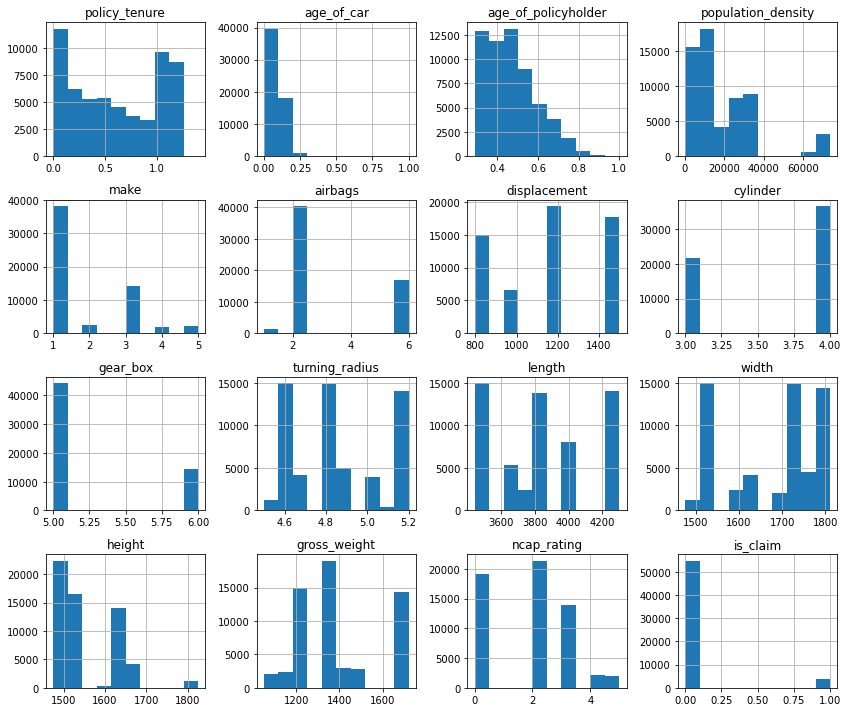

In [14]:
df.hist(figsize=(12, 10))
plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

### Observations
- Most people (7000) have had their policy active for 0.1 years.
- The majority of people opt for insurance immediately when they purchase a car.
- Most policyholders are 0.3–0.4 years of age.
- Most people prefer 'make 1' cars, followed by 'make 3, and the least preferred are '2, '4, and '5.
- The number of airbags in most cars is 5. The number of airbags in most cars is "2" (40k+), while the 2nd most popular choice is '6' (16k approx).
- The 1 airbag is present in almost 1000 cars, while no car has 3, 4 or 5 airbags.
- Most cars have a ncap rating of '2' (20k+), followed by a rating of 0' (approximately 19k).
- Cars with ratings of '4' and '5' are the safest (2.5k each).

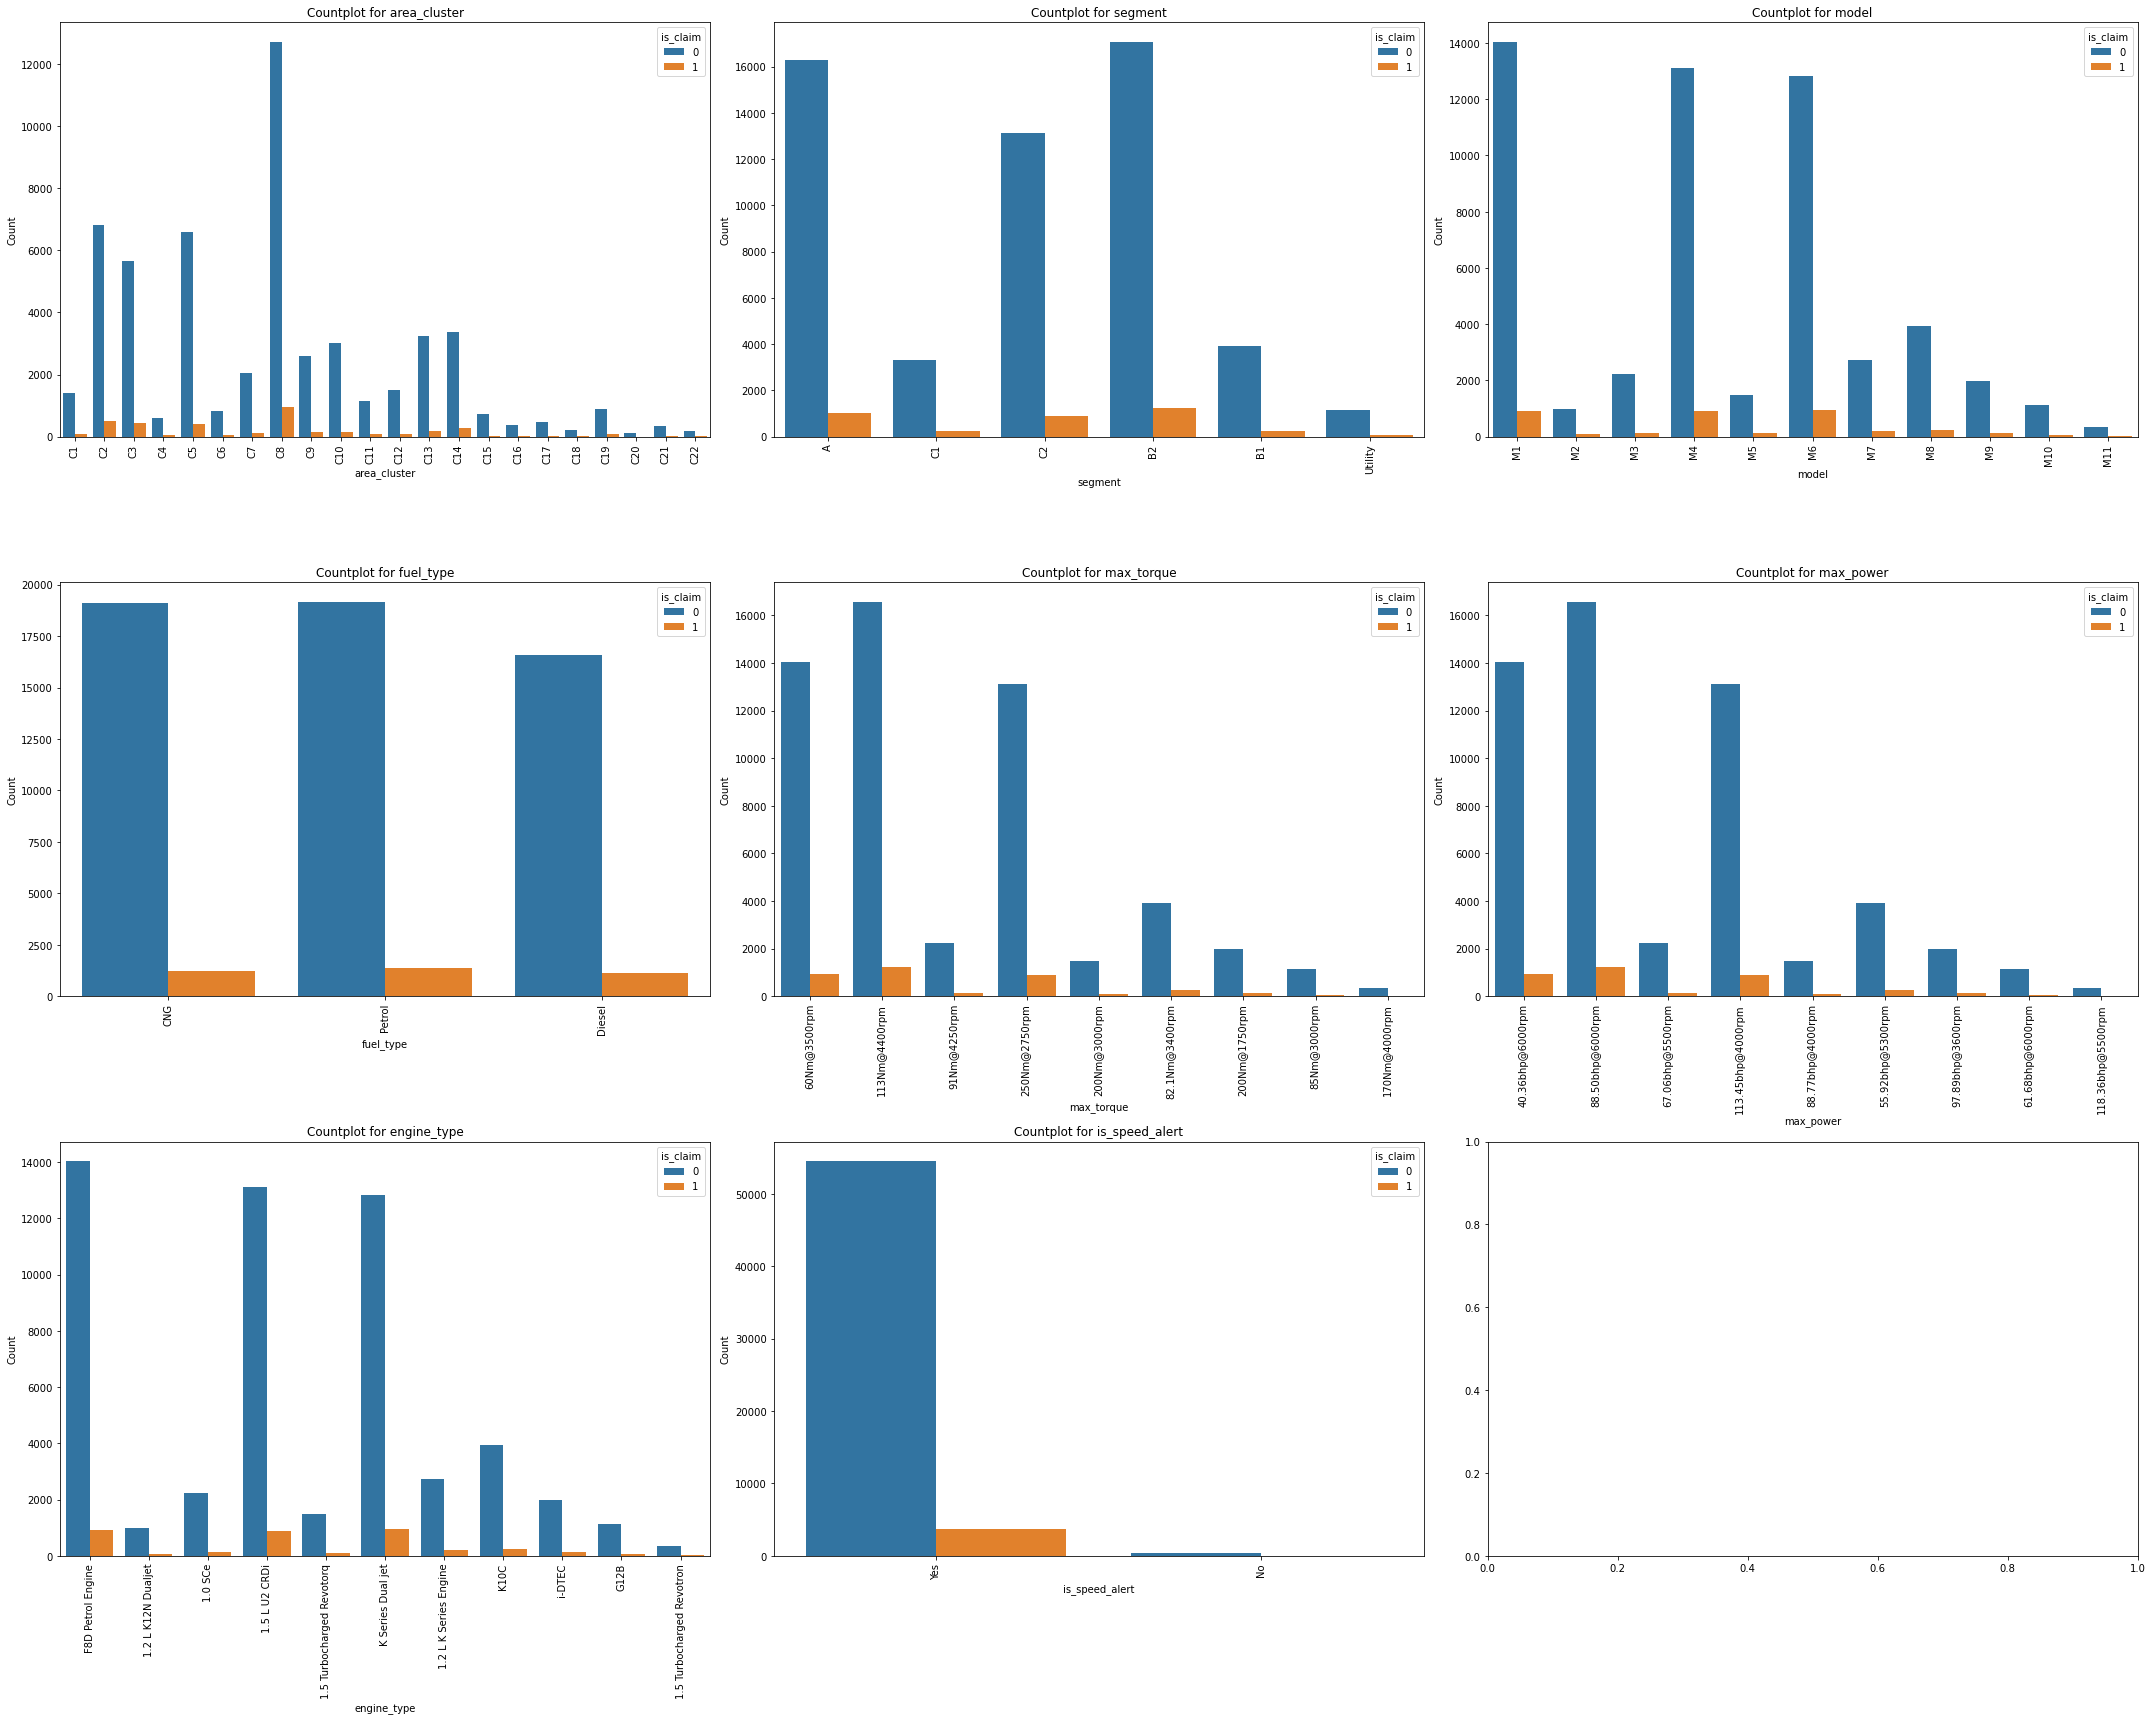

In [15]:
# Create the figure and subplots
fig, axes = plt.subplots(3,3, figsize=(30,24))
axes = axes.flatten()

cols_1=['area_cluster', 'segment', 'model', 'fuel_type', 'max_torque','max_power', 'engine_type', 'is_speed_alert']

for i, column in enumerate(cols_1):
    ax = axes[i]  # Select the current subplot

    # Plot the countplot
    sns.countplot(data=df, x=column, ax=ax, hue='is_claim')
    ax.set_title(f'Countplot for {column}')
    
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels if need
    
    
# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

### Observations
- The highest number of claims (about 1000) comes from area C8, second highest number of claims is from area C2 (about 700)
- Owners of models M1, M4, and M6 have the highest claims (approximately 1000+ each).
- There are zero claims where the speed alert system isn't present in the car.

### Data Preprocessing

In [16]:
df['max_torque'].value_counts()

113Nm@4400rpm     17796
60Nm@3500rpm      14948
250Nm@2750rpm     14018
82.1Nm@3400rpm     4173
91Nm@4250rpm       2373
200Nm@1750rpm      2114
200Nm@3000rpm      1598
85Nm@3000rpm       1209
170Nm@4000rpm       363
Name: max_torque, dtype: int64

### Feature Engineering - Extract new feature

In [17]:
# Let's derive a new feature by extracting the torque and rpm components from the aforementioned features. 
# We will calculate the 'torque/rpm ratio' to provide further insight.
df['torque'] = df['max_torque'].apply(lambda x: re.findall(r'\d+\.?\d*(?=Nm)', x)[0])
df['rpm'] = df['max_torque'].apply(lambda x: re.findall(r'\d+\.?\d*(?=rpm)', x)[0])

In [18]:
df.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,torque,rpm
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,...,No,Yes,No,No,No,Yes,0,0,60,3500
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,...,No,Yes,No,No,No,Yes,0,0,60,3500
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,...,No,Yes,No,No,No,Yes,0,0,60,3500
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,2,0,113,4400
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,...,Yes,Yes,No,Yes,Yes,Yes,2,0,91,4250


In [19]:
df.dtypes

policy_tenure                       float64
age_of_car                          float64
age_of_policyholder                 float64
area_cluster                         object
population_density                    int64
make                                  int64
segment                              object
model                                object
fuel_type                            object
max_torque                           object
max_power                            object
engine_type                          object
airbags                               int64
is_esc                               object
is_adjustable_steering               object
is_tpms                              object
is_parking_sensors                   object
is_parking_camera                    object
rear_brakes_type                     object
displacement                          int64
cylinder                              int64
transmission_type                    object
gear_box                        

In [20]:
# Convert the torque and rpm to Numeric data type
df['torque'] = pd.to_numeric(df['torque'])
df['rpm'] = pd.to_numeric(df['rpm'])

In [21]:
df.dtypes

policy_tenure                       float64
age_of_car                          float64
age_of_policyholder                 float64
area_cluster                         object
population_density                    int64
make                                  int64
segment                              object
model                                object
fuel_type                            object
max_torque                           object
max_power                            object
engine_type                          object
airbags                               int64
is_esc                               object
is_adjustable_steering               object
is_tpms                              object
is_parking_sensors                   object
is_parking_camera                    object
rear_brakes_type                     object
displacement                          int64
cylinder                              int64
transmission_type                    object
gear_box                        

In [22]:
# Calculate torque to RPM ratio 
df['torque to rpm ratio'] = df['torque'] / df['rpm']

In [23]:
df.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,torque,rpm,torque to rpm ratio
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,...,Yes,No,No,No,Yes,0,0,60.0,3500,0.017143
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,...,Yes,No,No,No,Yes,0,0,60.0,3500,0.017143
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,...,Yes,No,No,No,Yes,0,0,60.0,3500,0.017143
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,2,0,113.0,4400,0.025682
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,...,Yes,No,Yes,Yes,Yes,2,0,91.0,4250,0.021412


In [24]:
# Drop redundant columns such as "max_torque", "torque", "rpm"
df.drop('max_torque', axis=1,inplace=True)
df.drop('rpm',axis=1,inplace=True)
df.drop('torque',axis=1,inplace=True)

In [25]:
df.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_power,...,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,torque to rpm ratio
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,40.36bhp@6000rpm,...,No,No,Yes,No,No,No,Yes,0,0,0.017143
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,40.36bhp@6000rpm,...,No,No,Yes,No,No,No,Yes,0,0,0.017143
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,40.36bhp@6000rpm,...,No,No,Yes,No,No,No,Yes,0,0,0.017143
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,88.50bhp@6000rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0,0.025682
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,67.06bhp@5500rpm,...,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0,0.021412


In [26]:
df['max_power'].value_counts()

88.50bhp@6000rpm     17796
40.36bhp@6000rpm     14948
113.45bhp@4000rpm    14018
55.92bhp@5300rpm      4173
67.06bhp@5500rpm      2373
97.89bhp@3600rpm      2114
88.77bhp@4000rpm      1598
61.68bhp@6000rpm      1209
118.36bhp@5500rpm      363
Name: max_power, dtype: int64

- bhp: This represents brake horsepower, a unit of power used to measure the engine's total power output.
- rpm: This denotes revolutions per minute, which measures how fast the engine's crankshaft is rotating.

In [27]:
# Splitting the bhp and rpm
df['power'] = df['max_power'].apply(lambda x: re.findall(r'\d+\.?\d*(?=bhp)', x)[0])
df['rpm'] = df['max_power'].apply(lambda x: re.findall(r'\d+', x)[-1])

In [28]:
df.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_power,...,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,torque to rpm ratio,power,rpm
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,40.36bhp@6000rpm,...,Yes,No,No,No,Yes,0,0,0.017143,40.36,6000
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,40.36bhp@6000rpm,...,Yes,No,No,No,Yes,0,0,0.017143,40.36,6000
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,40.36bhp@6000rpm,...,Yes,No,No,No,Yes,0,0,0.017143,40.36,6000
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,88.50bhp@6000rpm,...,Yes,Yes,Yes,Yes,Yes,2,0,0.025682,88.50,6000
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,67.06bhp@5500rpm,...,Yes,No,Yes,Yes,Yes,2,0,0.021412,67.06,5500


In [29]:
# Convert the power and rpm columns to numeric data type
df['power'] = pd.to_numeric(df['power'])
df['rpm'] = pd.to_numeric(df['rpm'])

In [30]:
df.dtypes

policy_tenure                       float64
age_of_car                          float64
age_of_policyholder                 float64
area_cluster                         object
population_density                    int64
make                                  int64
segment                              object
model                                object
fuel_type                            object
max_power                            object
engine_type                          object
airbags                               int64
is_esc                               object
is_adjustable_steering               object
is_tpms                              object
is_parking_sensors                   object
is_parking_camera                    object
rear_brakes_type                     object
displacement                          int64
cylinder                              int64
transmission_type                    object
gear_box                              int64
steering_type                   

In [31]:
# Calculate power to RPM ratio
df['power to rpm ratio'] = df['power'] / df['rpm']

In [32]:
df.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_power,...,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,torque to rpm ratio,power,rpm,power to rpm ratio
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,40.36bhp@6000rpm,...,No,No,No,Yes,0,0,0.017143,40.36,6000,0.006727
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,40.36bhp@6000rpm,...,No,No,No,Yes,0,0,0.017143,40.36,6000,0.006727
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,40.36bhp@6000rpm,...,No,No,No,Yes,0,0,0.017143,40.36,6000,0.006727
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,88.50bhp@6000rpm,...,Yes,Yes,Yes,Yes,2,0,0.025682,88.50,6000,0.014750
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,67.06bhp@5500rpm,...,No,Yes,Yes,Yes,2,0,0.021412,67.06,5500,0.012193


In [33]:
# Drop redundant columns such as "max_power", "power", "rpm"
df.drop('power', axis=1,inplace=True)
df.drop('rpm',axis=1,inplace=True)
df.drop('max_power',axis=1,inplace=True)

In [34]:
df.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,engine_type,...,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,torque to rpm ratio,power to rpm ratio
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,F8D Petrol Engine,...,No,Yes,No,No,No,Yes,0,0,0.017143,0.006727
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,F8D Petrol Engine,...,No,Yes,No,No,No,Yes,0,0,0.017143,0.006727
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,F8D Petrol Engine,...,No,Yes,No,No,No,Yes,0,0,0.017143,0.006727
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,1.2 L K12N Dualjet,...,Yes,Yes,Yes,Yes,Yes,Yes,2,0,0.025682,0.014750
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,1.0 SCe,...,Yes,Yes,No,Yes,Yes,Yes,2,0,0.021412,0.012193


In [35]:
# Encoding all the boolean data into numerical values to fit machine learning models
is_cols=[col for col in df.columns if col.startswith("is") and col!="is_claim"]
print(is_cols)

['is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert']


In [36]:
df = df.replace({ "No" : 0 , "Yes" : 1 })

In [37]:
dataset_num_col = df.select_dtypes(include=['int', 'float']).columns
print(" Data Set Numerical columns:")
print(dataset_num_col.nunique())
print(dataset_num_col)

 Data Set Numerical columns:
35
Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'displacement', 'cylinder', 'gear_box',
       'turning_radius', 'length', 'width', 'height', 'gross_weight',
       'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim',
       'torque to rpm ratio', 'power to rpm ratio'],
      dtype='object')


In [38]:
dataset_cat_cols = df.select_dtypes(include=['object']).columns
print("Data Set categorical columns:")
print(dataset_cat_cols.nunique())
print(dataset_cat_cols)

Data Set categorical columns:
8
Index(['area_cluster', 'segment', 'model', 'fuel_type', 'engine_type',
       'rear_brakes_type', 'transmission_type', 'steering_type'],
      dtype='object')


### Feature Engineering
- Convert categorical variables like 'area_cluster', 'segment', 'model', 'fuel_type', 'engine_type', 'rear_brakes_type', 'transmission_type', 'steering_type' into numerical representations using techniques like one-hot encoding or label encoding.

In [39]:
# pd.get_dummies(): This is a Pandas function that performs one-hot encoding on categorical variables. 
# It converts categorical variables into a binary (0 or 1) format, making them suitable for machine learning 
# models.

# drop_first=True: When set to True, this option drops the first category in each categorical variable 
# to avoid multicollinearity, as the information from the dropped category can be inferred from the other 
# categories.

df= pd.get_dummies(df, columns=dataset_cat_cols,drop_first=True)

### Undersampling
- To address the significant class imbalance in the dataset, we've undertaken a strategic adjustment to ensure the production of meaningful and valid results. Our approach involves implementing undersampling, specifically reducing the ratio of accepted claims to rejected claims to a balanced 2:1 ratio.

In [40]:
# Separate the majority and minority classes
majority_class = df[df['is_claim'] == 0]
minority_class = df[df['is_claim'] == 1]

# Undersample the majority class
undersampled_majority = resample(
    majority_class,
    replace=False,  # Set to False for undersampling
    n_samples=len(minority_class) * 2,  # Desired number of records in the majority class
    random_state=42  # Set a random seed for reproducibility
)

# Combine the undersampled majority class with the minority class
df_final = pd.concat([undersampled_majority, minority_class])

- The majority and minority classes are separated based on the 'is_claim' column in the DataFrame 'df.' 
- The majority class contains rows where 'is_claim' is equal to 0, and the minority class contains rows 
where 'is_claim' is equal to 1.
- The 'resample' function is used to undersample the majority class. 

#### The key parameters are as follows:
- majority_class: This is the majority class data that is to undersample.
- replace=False: Setting this to False ensures that sampling is done without replacement, meaning that each 
selected sample from the majority class is unique.
- n_samples=len(minority_class) * 2: This determines the desired number of records in the majority class 
after undersampling. In this case, it's set to twice the number of samples in the minority class to balance the 
classes.
- random_state=42: This sets a random seed for reproducibility. 
It ensures that the same undersampling process can be replicated in the future.
After undersampling, now we have a new DataFrame called 'undersampled_majority,' which contains a reduced number 
of samples from the majority class.
This 'df_final' DataFrame has a balanced class distribution, making it suitable for training a 
machine learning model without the bias that can result from class imbalance.

### Correlation Heatmap
- Now to check which input features are the least strongly correlated to the target variable 'is_claim', we will plot the correlation heat matrix of the Top 10 least correlated variables available to us.

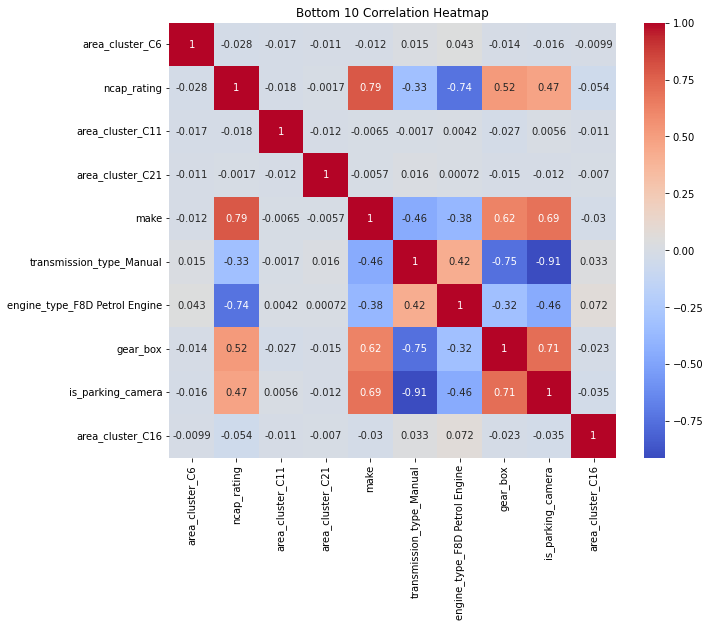

In [41]:
num_bottom_features = 10

correlation_values = df_final.corr()['is_claim'].abs().sort_values(ascending=True)[:num_bottom_features]
bottom_features = correlation_values.index

subset_df = df_final[bottom_features]
correlation_matrix = subset_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title(f'Bottom {num_bottom_features} Correlation Heatmap')
plt.show()

### Observations
- 3 variables correlated to or affecting the 'is_claim' variable are:

1. gear_box
2. is_parking_camera
3. area_cluster_C16

### Splitting the dataset

In [42]:
X = df_final.drop(['gear_box', 'is_parking_camera', 'area_cluster_C16'], axis=1)  # Features
y = df_final['is_claim']  # Target variable

In [43]:
# Dataset is split in the ration 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
y_train.value_counts()

0    5987
1    3008
Name: is_claim, dtype: int64

In [45]:
# Training Dataset
# Not Claimed: 5987
# Claimed: 3008

In [46]:
y_test.value_counts()

0    1509
1     740
Name: is_claim, dtype: int64

In [47]:
# Test Dataset
# Not Claimed: 1509
# Claimed: 740

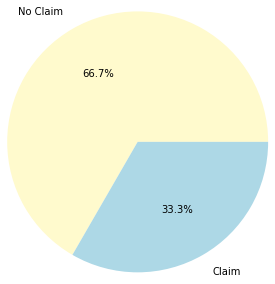

In [48]:
plt.pie(y.value_counts(),labels=['No Claim','Claim'],radius=1.5,colors = ['#FFFACD','#ADD8E6'],
        autopct='%1.1f%%',labeldistance=1.15,startangle =0)

plt.show()

- The target class is now balanced with the desired number of claims and no claims.

### Classification model selection and training
- The dataset we are using in this project is high-dimensional in nature, containing various complex relationships, so we will be using multiple classification techniques to find our best fit.

### Logistic Regression

In [49]:
# Create an instance of Logistic Regression
logreg = LogisticRegression()

# Fit the logistic regression model on the training data
logreg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Accuracy: 0.6634059582036461
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.95      0.79      1509
           1       0.44      0.08      0.14       740

    accuracy                           0.66      2249
   macro avg       0.56      0.52      0.46      2249
weighted avg       0.60      0.66      0.58      2249



### Observations
- The accuracy is approximately 66.34%, which means that the model correctly predicted the class label for 66.34% 
of the total observations in the dataset.

- Precision: For class 0, the precision is 0.68, which means that out of all the instances the model predicted as class 0, 68% were actually class 0. 
For class 1, the precision is 0.44, indicating that out of all the instances the model predicted as class 1, 44% were actually class 1. Precision is a measure of how well the model avoids false positives.

- Recall: For class 0, the recall is 0.95, which means that the model correctly identified 95% of the instances 
that truly belonged to class 0. For class 1, the recall is 0.08, indicating that the model correctly identified 
only 8% of the instances that truly belonged to class 1. 

- F1-Score: Harmonic mean of precision and recall. 
For class 0, the F1-score is 0.79, and for class 1, it is 0.14.

- The model has a reasonably high accuracy but has low recall for class 1, meaning it struggles to correctly 
identify instances of class 1. The precision for class 1 is also relatively low, indicating a high rate of 
false positives. The model's performance may need improvement, especially if correctly identifying class 1 
instances is crucial.

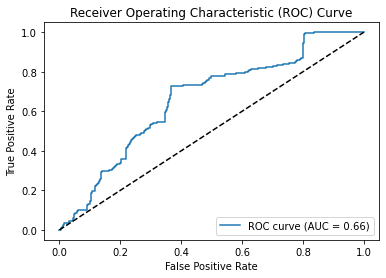

In [50]:
# Get the predicted probabilities for the positive class
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Random Forest

In [51]:
rf = RandomForestClassifier()

In [52]:
param_grid = {
    'n_estimators': [250,300],
    'max_depth': [20, 25,30,35],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

In [53]:
random_search = RandomizedSearchCV(estimator=rf,param_distributions=param_grid,
                scoring='accuracy',n_iter=3, cv=3, random_state=45)

In [54]:
random_search.fit(X_train, y_train) 

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=3,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [20, 25, 30, 35],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [250, 300]},
                   random_state=45, scoring='accuracy')

In [55]:
print("Best Hyperparameters: ", random_search.best_params_)

Best Hyperparameters:  {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 35, 'bootstrap': True}


In [56]:
print("Best Accuracy Score: ", random_search.best_score_)

Best Accuracy Score:  1.0


In [57]:
rf=RandomForestClassifier(n_estimators=300, min_samples_split=5,min_samples_leaf=4,
                          max_depth=35, bootstrap=True,max_features='sqrt')

In [58]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=35, max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=5, n_estimators=300)

In [59]:
y_train_pred = rf.predict(X_train)
y_test_pred  = rf.predict(X_test)

In [60]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Accuracy: 0.6634059582036461
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.95      0.79      1509
           1       0.44      0.08      0.14       740

    accuracy                           0.66      2249
   macro avg       0.56      0.52      0.46      2249
weighted avg       0.60      0.66      0.58      2249



### Observations
- The Random Forest model shows a relatively high accuracy and good performance for class 0 (No Claims). 
- class 1 (Claims), having low precision and recall, which may indicate a high rate of false results and missed claims.

Class 0 (No Claims):
- Precision (0.68): The model correctly identifies 68% of the instances predicted as "No Claims" out of all instances in that category. This suggests relatively good precision for class 0.
- Recall (0.95): The model correctly identifies 95% of the actual "No Claims" instances, indicating a high recall for class 0. It is effective at finding class 0 instances.

Class 1 (Claims):
- Precision (0.44): The precision for class 1 is relatively low at 44%, meaning that out of all instances predicted as "Claims," only 44% are actually "Claims." This suggests a high rate of false positives.
- Recall (0.08): The recall for class 1 is low at 8%, indicating that the model struggles to correctly identify actual "Claims." It has a high rate of false negatives for class 1.

In [61]:
# Get the predicted probabilities for the positive class
y_pred_proba = rf.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y_test, y_pred_proba)

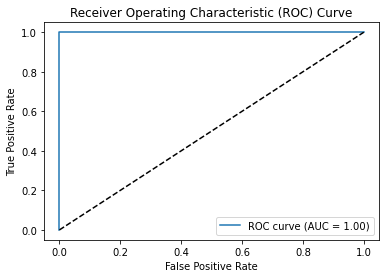

In [62]:
# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Decision Tree

In [63]:
# Create an instance of DecisionTreeClassifier
tree = DecisionTreeClassifier()

# Fit the decision tree model on the training data
tree.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = tree.predict(X_test)

In [64]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1509
           1       1.00      1.00      1.00       740

    accuracy                           1.00      2249
   macro avg       1.00      1.00      1.00      2249
weighted avg       1.00      1.00      1.00      2249



### Observations
- The Decision Tree model achieves a perfect classification performance on the provided dataset. It correctly identifies all instances of both class 0 and class 1, resulting in perfect precision, recall, and F1-scores for both classes

Class 0 (No Claims):
- Precision (1.00): The model correctly identifies all instances predicted as "No Claims" out of all instances in that category. This indicates a perfect precision for class 0.
- Recall (1.00): The model correctly identifies all the actual "No Claims" instances, demonstrating a perfect recall for class 0. It successfully finds all class 0 instances.

Class 1 (Claims):
- Precision (1.00): The precision for class 1 is also perfect at 1.00, meaning that out of all instances predicted as "Claims," all are actually "Claims." This indicates perfect precision for class 1.
- Recall (1.00): The model correctly identifies all actual "Claims" instances, achieving a perfect recall for class 1. It successfully finds all class 1 instances.

In [65]:
# Get the predicted probabilities for the positive class
y_pred_proba = tree.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y_test, y_pred_proba)

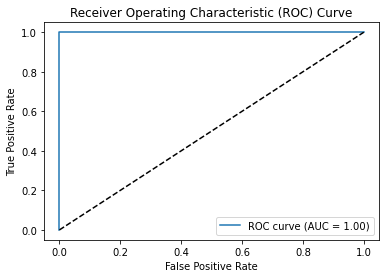

In [66]:
# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### K Nearest Neighbours Classifier

In [67]:
# Create an instance of KNeighborsClassifier with the desired number of neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN model on the training data
knn.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test)

In [68]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9862160960426857
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1509
           1       1.00      0.96      0.98       740

    accuracy                           0.99      2249
   macro avg       0.99      0.98      0.98      2249
weighted avg       0.99      0.99      0.99      2249



### Observations
- The K-Nearest Neighbors (KNN) model demonstrates excellent classification performance on the provided dataset. It achieves high accuracy, precision, recall, and F1-scores for both class 0 and class 1. The model is particularly effective at correctly identifying instances of class 0 and has a high rate of true positives for class 1, making it a strong performer for this classification task.

Class 0 (No Claims):
- Precision (0.98): The model correctly identifies 98% of the instances predicted as "No Claims" out of all instances in that category. This indicates a high precision for class 0.
- Recall (1.00): The model correctly identifies all the actual "No Claims" instances, achieving a perfect recall for class 0. It successfully finds all class 0 instances.

Class 1 (Claims):
- Precision (1.00): The precision for class 1 is perfect at 1.00, meaning that out of all instances predicted as "Claims," all are actually "Claims." This indicates perfect precision for class 1.
- Recall (0.96): The model correctly identifies 96% of the actual "Claims" instances, demonstrating a high recall for class 1. It effectively finds a large majority of class 1 instances.

In [69]:
# Get the predicted probabilities for the positive class
y_pred_proba = knn.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y_test, y_pred_proba)

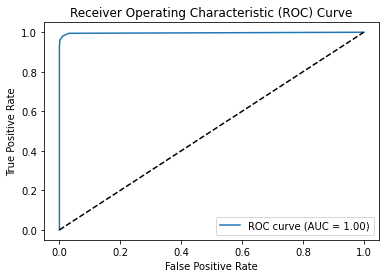

In [70]:
# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Naive Bayes Classifier

In [71]:
# Create an instance of Gaussian Naive Bayes classifier
naive_bayes = GaussianNB()

# Fit the Naive Bayes model on the training data
naive_bayes.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = naive_bayes.predict(X_test)

In [72]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9911071587372166
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1509
           1       1.00      0.97      0.99       740

    accuracy                           0.99      2249
   macro avg       0.99      0.99      0.99      2249
weighted avg       0.99      0.99      0.99      2249



### Observations
- The Naive Bayes model demonstrates exceptional classification performance on the provided dataset. It achieves extremely high accuracy, precision, recall, and F1-scores for both class 0 and class 1. The model is particularly effective at correctly identifying instances of both class 0 and class 1, making it a robust performer for this classification task.

Class 0 (No Claims):
- Precision (0.99): The model correctly identifies 99% of the instances predicted as "No Claims" out of all instances in that category. This indicates a high precision for class 0.
- Recall (1.00): The model correctly identifies all the actual "No Claims" instances, achieving a perfect recall for class 0. It successfully finds all class 0 instances.

Class 1 (Claims):
- Precision (1.00): The precision for class 1 is perfect at 1.00, meaning that out of all instances predicted as "Claims," all are actually "Claims." This indicates perfect precision for class 1.
- Recall (0.97): The model correctly identifies 97% of the actual "Claims" instances, demonstrating a high recall for class 1. It effectively finds the majority of class 1 instances.

In [73]:
# Get the predicted probabilities for the positive class
y_pred_proba = naive_bayes.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y_test, y_pred_proba)


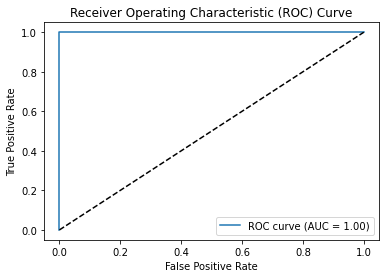

In [74]:
# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [75]:
# Define the models and their respective parameter grids
models = [
    ("Logistic Regression", LogisticRegression(), {}),
    ("Random Forest", RandomForestClassifier(), {}),
    ("Decision Tree", DecisionTreeClassifier(), {}),
    ("KNN", KNeighborsClassifier(), {}),
    ("Naive Bayes", GaussianNB(), {})
]

best_model = None
best_accuracy = 0

In [76]:
# Iterate over each model
for name, model, params in models:
    random_search = RandomizedSearchCV(estimator=model, param_distributions=params,
                                       scoring='accuracy', n_iter=3, cv=3, random_state=45)
    random_search.fit(X_train, y_train)
    accuracy = random_search.best_score_

    print(f"Model: {name}")
    print(f"Best Accuracy: {accuracy}")
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

print(f"\nBest Model based on Accuracy: {best_model}")

Model: Logistic Regression
Best Accuracy: 0.7765548637775114
Model: Random Forest
Best Accuracy: 1.0
Model: Decision Tree
Best Accuracy: 1.0
Model: KNN
Best Accuracy: 0.9776545854770506
Model: Naive Bayes
Best Accuracy: 0.988994293035044

Best Model based on Accuracy: RandomForestClassifier()


### Random Forest Classifier

In [77]:
rf = RandomForestClassifier()

In [78]:
param_grid = {
    'n_estimators': [250,300],
    'max_depth': [20, 25,30,35],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

In [79]:
random_search = RandomizedSearchCV(estimator=rf,param_distributions=param_grid,
                scoring='accuracy',n_iter=3, cv=3, random_state=45)

In [80]:
random_search.fit(X_train, y_train) 

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=3,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [20, 25, 30, 35],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [250, 300]},
                   random_state=45, scoring='accuracy')

In [81]:
print("Best Hyperparameters: ", random_search.best_params_)

Best Hyperparameters:  {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 35, 'bootstrap': True}


In [82]:
print("Best Accuracy Score: ", random_search.best_score_)

Best Accuracy Score:  1.0


In [83]:
rf=RandomForestClassifier(n_estimators=300, min_samples_split=5,min_samples_leaf=4,
                          max_depth=35, bootstrap=True,max_features='sqrt')

In [84]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=35, max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=5, n_estimators=300)

In [85]:
y_train_pred = rf.predict(X_train)
y_test_pred  = rf.predict(X_test)

In [86]:
# Classification report for random forest
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9911071587372166
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1509
           1       1.00      0.97      0.99       740

    accuracy                           0.99      2249
   macro avg       0.99      0.99      0.99      2249
weighted avg       0.99      0.99      0.99      2249



### Observations
- It demonstrates an ability to effectively identify both class 0 and class 1 instances while maintaining a very low rate of false positives. This indicates that the model is a robust performer for the classification task and is well-suited for applications where precision and recall are critical.

Class 0 (No Claims):
- Precision (0.99): The model correctly identifies 99% of the instances predicted as "No Claims" out of all instances in that category. This suggests that the model has an extremely low rate of false positives for class 0.
- Recall (1.00): The model correctly identifies all the actual "No Claims" instances, achieving a perfect recall for class 0. It effectively finds all class 0 instances.

Class 1 (Claims):
- Precision (1.00): The precision for class 1 is perfect at 1.00, indicating that out of all instances predicted as "Claims," all are actually "Claims." This implies that there are no false positives for class 1.
- Recall (0.97): The model correctly identifies 97% of the actual "Claims" instances, demonstrating a high recall for class 1. It effectively finds the majority of class 1 instances.

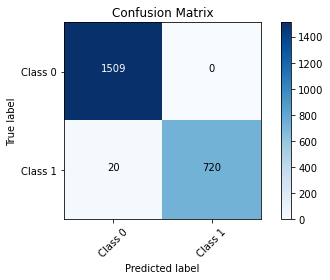

In [87]:
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = 'd'    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

plot_confusion_matrix(y_test, y_pred, classes=['Class 0', 'Class 1'])
plt.show()

In [88]:
# Get the predicted probabilities for the positive class
y_pred_proba = rf.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y_test, y_pred_proba)

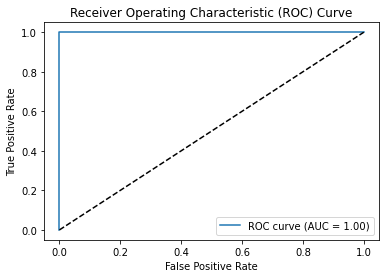

In [89]:
# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Result:
- From the above confusion matrix, we can observe that the majority of data instances are situated on the main diagonal, representing true positive and true negative values. This indicates that the model correctly predicted that insurance claims labeled as 'passed' were indeed approved, and nearly all claims labeled as 'not passed' were correctly identified as not approved. There were only 20 instances where the model incorrectly predicted a claim to be approved when it was not, resulting in an accuracy rate of nearly 100%.